# Beberapa Macam Regresi Linier

## Regresi Linier Kuadrat Terkecil/ Ordinary Least Square (OLS)

Tinjau sebuah data $(y_i,\mathbf{x}_i)$ dengan indeks $i=1\dots n$. $\mathbf{x}_i$ adalah vektor yang mawakili *feature* dari data yang dimisalkan memiliki dimensi $p$. Didefinisika $n \times p$ *matriks desain* $X$ yang baris $\textbf{x}_1,\cdots, \textbf{x}_n$ menunjukan nilai dari *feature* sedangkan kolom $X_1,\cdots, X_p$ menunjukan *feature*  dari data. Selain itu $n$-dimensional dari data sampel $i$ dinyatakan dalam bentuk vektor kolom 
$\mathbf{y}_i$ dan parameter regeresi dinyatakan dalam bentuk $p$-dimensional vektor kolom $\mathbf{w}\in\mathbb{R}^p$.

Untuk Regresi OLS, minimalisasi dari fungsi cost nya ditulisakan dalam bentuk
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||X\textbf{w}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(X\mathbf{w}-\mathbf{y})^T(X\mathbf{w}-\mathbf{y}),
$$
atau 
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}_i)^2.
$$

jika $rank(X)=p$ *feature-feature* $X_1,\cdots X_p$ saling bebas sehingga terdapat solusi yang unik untuk masalah ini yaitu:

$$
\hat{\textbf{w}}= (X^TX)^{-1}X^T \textbf{y}
$$

Metode OLS ini akan tidak *well-defined* ketika jumlah data lebih kecil daripada *feature* data, $n<p$ dengan kata lain rank$(X)>p$. Salah satu cara untuk mengatasi ini adalah dengan menambahkankan <i> regularize</i> pada persamaan OLS. Kita akan meninju dua jenis *regularizers* yaitu <b> L2-regularization</b> yang sering disebut <b> Ridge-Regression</b> dan  <b> L1-regularization</b> yang sering disebut <b>LASSO</b>.

## Ridge Regression
Pada Ridge-Regression, *regularization* parameter didefinisikan pada L2-norm
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

sehingga persamaan OLS nya menjadi 
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||X\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Parameter $\lambda$ mengontrol berapa besar bobot untuk suku *regularization*.

Perlu diingat ketika rank$(X)>p$ OLS tidak memiliki solusi yang unik, namun ketika suku *regularization* ditambahkan akan didapatlan solusi 
$\mathbf{w}_{ridge}= (X^TX+\lambda I)^{-1}X^T \textbf{y}$.

# Lasso Regression
Lasso regression sering disebut juga dengan Sparse Regression sebab koefisien parameter regresi yang dihasilkan oleh Lasso akan banyak bernilai nol. Secara intuitf mengatakan bahwa Lasso regression ini akan memilih *feature-feature* yang penting pada data.

Parameter *regularization* pada Lasso didefinisikan pada L1-norm yaitu :
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
atau 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}}  ||X\mathbf{w}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$

# Eksperimen Numerik dengan menggunakan Ridge dan Lasso Regression

Akan ditunjukan kasus sederhana yang akan memberikan gambaran intuitve tentang
Ridge dan Lasso. 
Kasus sederhana ini menggunakan dataset diabetes yang tersedia dalam paket pemograman Scikit-Learn. Dalam dataset diabetes ini terdapat sepuluh *feature* yakni umur,kelami, *body mass index*, tekanan darah rata-rata dan 6 lainnya adalah data dari pengukuran serum darah dan dengan $n=442$.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import datasets, linear_model

#Memuat data
number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]


#model Ridge dan Lasso
ridge=linear_model.Ridge()
lasso=linear_model.Lasso()

#memilih variasi nilai alpha (alpha disini adalah lambda pada buku2 ML, namun untuk memudahkan pemahaman diganti 
#alpha afa sesuai dengan paker scikit-learn)

alphas=np.logspace(-2,2,10)
# memilih 150 data sebagai data latih, 
n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
#fungsi untuk menyimpan E_in dan E_out
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()

coefs_ridge = []
coefs_lasso=[]
ridge_predict=[]
#lasso_predict=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
   # ridge_predict.append(ridge.predict(X_train))
    
    # Koefisien R^2 digunakan untuk melihat performa
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
   # lasso_predict.append(lasso.predict(X_train))
    
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))


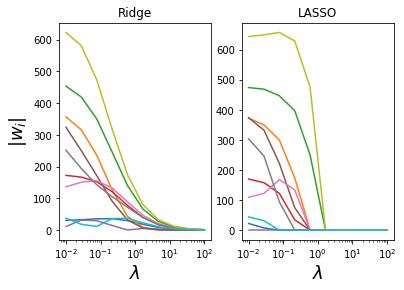

In [64]:
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()


Dari grafik diatas ketika $\lambda=0$ baik Ridge atau Lasso akan mengakibatkan persamaan regressinya akan kembali menjadi OLS, sehingga parameter yang didapatkan akan sama dengan parameter regresi OLS. Seiring dengan $\lambda$ meningkat koefisien parameter Ridge akan menuju nol, dan semakin besar nilai $\lambda$ membuat koefisien parameternya nol. Sedangkan pada Lasso beberapa parameter pada $\lambda=0$ sudah bernilai nol yang secara kasar bisa diartikan Lasso dapat memilih *feature* yang paling mempengerahui data saja.
terlihat bahwa koefisien $\mathbf{w}_i$ pada Lasso regression lebih banyak nilai nolnya dibandingkan dengan ridge 
regression

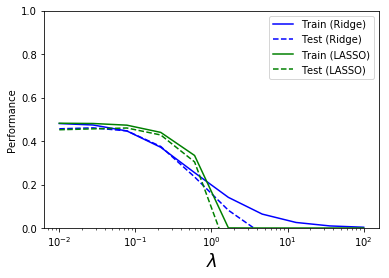

In [39]:
# Plot performa
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

Untuk performa model dengan data latih 100 dan data test 100, performa yang baik dimiliki oleh model Lasso hal ini ditunjukan dengan perbedaan $E_{in}$ dan dan $E_{out}$ yang sedikit, akan dicoba diplot kembali jika jumlah data trainin dan test diubah.

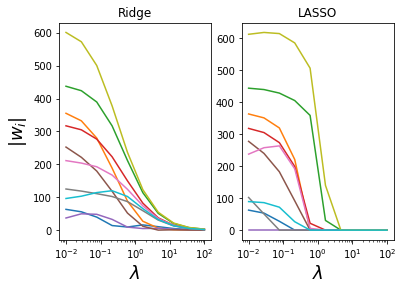

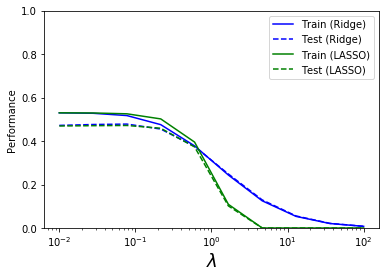

In [67]:
alphas=np.logspace(-2,2,10)
# memilih 150 data sebagai data latih, 
n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples], X[50:]
y_train, y_test = y[:n_samples], y[50:]
#fungsi untuk menyimpan E_in dan E_out
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()

coefs_ridge = []
coefs_lasso=[]
ridge_predict=[]
#lasso_predict=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
   # ridge_predict.append(ridge.predict(X_train))
    
    # Koefisien R^2 digunakan untuk melihat performa
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
   # lasso_predict.append(lasso.predict(X_train))
    
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
    
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()

# Plot performa
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


untuk grafik koefisien parameter regresi tidak terlalu berubah, namun untuk grafik performa nilai perbedaan $E_{in}$ dan $E_{out}$ lebih kecil dibandingkan dengan yang pertama,mengikuti persamaan 
$$| \bar{E_{in}} - \bar{E_{out}}| =2\sigma^2 \frac{p}{n}$$